# Task 1: Data Preparation

You will start by loading the CSV data from the file (using appropriate pandas functions) and checking whether the loaded data is equivalent to the data in the source CSV file.

Then, you need to clean the data by using the knowledge we taught in the lectures. You need to deal with all the potential issues/errors in the data appropriately.

###### (Please note that this is just a sample template, and please feel free to add more cells to complete of the sub-tasks in the assignment. The following existing cells are for example purposes only.)

In [1]:
# Import pandas library and other required libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import re

In [2]:
# Load the data from the file NBA_players_stats.csv using pandas library.
NBA_data = pd.read_csv("NBA_players_stats.csv",error_bad_lines=False)

In [3]:
#Getting a preview of the loaded data.
NBA_data.head(15)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,...,0.543,46,95,141,20,15,19,32,58,212
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,...,NaN,0,3,3,2,0,0,0,1,20000
2,3,Steven Adams,C,27,NOP,33,33,918,115,187,...,0.443,133,161,294,69,29,20,50,63,265
3,4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,...,0.847,72,241,313,179,29,34,98,80,634
4,5,LaMarcus Aldridge,C,35,SAS,21,18,544,115,248,...,0.838,17,77,94,36,8,18,20,36,28800
5,6,Ty-Shon Alexander,SG,22,PHO,3,0,8,0,3,...,NaN,0,1,1,1,0,0,0,1,0
6,7,Nickeil Alexander-Walker,SG,22,NOP,28,3,495,86,211,...,0.800,5,61,66,54,28,9,32,44,230
7,8,Grayson Allen,SG,25,MEM,23,12,551,67,164,...,0.895,8,57,65,50,23,3,21,30,214
8,9,Jarrett Allen,C,22,TOT,35,17,977,172,257,...,0.741,111,235,346,60,16,59,54,55,471
9,9,Jarrett Allen,C,22,BRK,12,5,320,44,65,...,0.754,38,87,125,20,7,19,22,21,134


In [4]:
#Checking whether the loaded data is equivalent to the source CSV file. There should be 492 NBA players.
NBA_data["Player"].value_counts()

Dennis Smith Jr.    3
Taurean Prince      3
Derrick Rose        3
James Harden        3
Alex Len            3
                   ..
Adam Mokoka         1
Mason Jones         1
Jevon Carter        1
Duncan Robinson     1
Sekou Doumbouya     1
Name: Player, Length: 492, dtype: int64

In [5]:
NBA_data.dtypes

Rk          int64
Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP          int64
FG          int64
FGA         int64
FG%       float64
3P          int64
3PA         int64
3P%       float64
2P          int64
2PA         int64
2P%       float64
FT          int64
FTA         int64
FT%       float64
ORB         int64
DRB         int64
TRB         int64
AST         int64
STL         int64
BLK         int64
TOV         int64
PF          int64
PTS         int64
dtype: object

In [6]:
#There are 492 NBA players present and number of columns is 29. Therefore, loaded data is same as source data.

In [7]:
#The main Goal is to judge the player's performance based on several factors(variables)

In [8]:
# Clean the data. This includes removing typos, impossible values, redundant white spaces, missing values, etc

#Creating new data frame to take in changes. 
clean_NBA_data = pd.DataFrame(columns=['Rk','Player','Pos','Age','Tm','G','GS','MP','FG','FGA','FG%','3P','3PA','3P%',
                                     '2P','2PA','2P%','FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK',
                                     'TOV','PF','PTS'],index=range(512))
clean_NBA_data.head(10)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Rank will not have errors, but Player column could
clean_NBA_data['Rk'] = NBA_data['Rk']

regex = re.compile('[@_!#$%^&*()<>?/\|}{~:]') 
sum=0
for i in NBA_data['Player']:
    if(regex.search(i) == None): 
        sum = sum + 1
print(sum)
#No special characters detected in Player's name so we can proceed to add Player column to clean_NBA_data

clean_NBA_data['Player'] = NBA_data['Player']

print(clean_NBA_data['Player'].head(10))

512
0            Precious Achiuwa
1                Jaylen Adams
2                Steven Adams
3                 Bam Adebayo
4           LaMarcus Aldridge
5           Ty-Shon Alexander
6    Nickeil Alexander-Walker
7               Grayson Allen
8               Jarrett Allen
9               Jarrett Allen
Name: Player, dtype: object


In [10]:
# Checking Pos column
NBA_data['Pos'].value_counts()
#As it can be seen, it contains typos, redundant white spaces and letter-case problems. 

SG        117
PF        102
C          98
PG         92
SF         83
 PG         3
SG          3
C           2
PG-SG       1
Pg          1
SF-PF       1
PFa         1
PF          1
sg          1
 SG         1
SF.         1
pg          1
Sf          1
SGa         1
 SF         1
Name: Pos, dtype: int64

In [11]:
#Fixing the above errors in Pos column
NBA_data['Pos'] = NBA_data['Pos'].str.strip()
NBA_data['Pos'].replace('PFa','PF',inplace=True)
NBA_data['Pos'].replace('sg','SG',inplace=True)
NBA_data['Pos'].replace('Sf','SF',inplace=True)
NBA_data['Pos'].replace('SF.','SF',inplace=True)
NBA_data['Pos'].replace('Pg','PG',inplace=True)
NBA_data['Pos'].replace('pg','PG',inplace=True)
NBA_data['Pos'].replace('SGa','SG',inplace=True)
clean_NBA_data['Pos'] = NBA_data['Pos']

clean_NBA_data['Pos'].value_counts()

SG       123
PF       104
C        100
PG        97
SF        86
PG-SG      1
SF-PF      1
Name: Pos, dtype: int64

In [12]:
#Checking Tm column for errors
NBA_data['Tm'].value_counts()
#Typos, redundant white spaces and case problem noticed

BRK     19
SAC     18
HOU     18
WAS     18
DET     17
CHI     17
DAL     17
TOR     17
NYK     17
LAL     17
DEN     17
CLE     17
ATL     16
MIN     16
UTA     16
ORL     16
PHO     15
OKC     15
MIA     15
LAC     15
BOS     15
GSW     14
MEM     14
IND     14
MIL     14
POR     14
NOP     14
SAS     14
PHI     14
CHO     14
TOT      9
BRK      3
 PHI     3
 IND     2
GSW      1
CLE      1
 BRK     1
 SAS     1
 MEM     1
 PHO     1
H0U      1
 TOT     1
 BOS     1
DET      1
ORL      1
IND      1
 NOP     1
MIL      1
 ORL     1
MIA      1
NyK      1
OKC      1
MEM      1
 WAS     1
SAS      1
Name: Tm, dtype: int64

In [13]:
NBA_data['Tm'] = NBA_data['Tm'].str.strip()
NBA_data['Tm'].replace('NyK','NYK',inplace=True)
NBA_data['Tm'].replace('H0U','HOU',inplace=True)
        
clean_NBA_data['Tm'] = NBA_data['Tm']
clean_NBA_data['Tm'].value_counts()

BRK    23
HOU    19
WAS    19
CLE    18
DET    18
ORL    18
NYK    18
SAC    18
PHI    17
LAL    17
DEN    17
DAL    17
TOR    17
CHI    17
IND    17
BOS    16
MIA    16
MIN    16
SAS    16
OKC    16
ATL    16
MEM    16
UTA    16
PHO    16
GSW    15
MIL    15
LAC    15
NOP    15
POR    14
CHO    14
TOT    10
Name: Tm, dtype: int64

In [14]:
#Checking for missing values in Age column
for i in NBA_data['Age']:
    if np.isnan(i):
        print("Missing a value!")

In [15]:
#Checking for impossible values in Age column
for i in NBA_data['Age']:
    #Minimum age for NBA player is 19 years old
    if i<19 or i>120:
        print("Impossible")
        print(i)

Impossible
280
Impossible
-19


In [16]:
#Checking which player had invalid value
player_with_invalid_age1 = NBA_data[['Player','Age']][NBA_data.Age==-19]
player_with_invalid_age2 = NBA_data[['Player','Age']][NBA_data.Age==280]
print(player_with_invalid_age1)
print(player_with_invalid_age2)
#Once players are identified, their age should be replaced with their true age. 

            Player  Age
197  Killian Hayes  -19
           Player  Age
162  Anthony Gill  280


In [17]:
#This is one way of checking whether ages -19 and 280 should be replaced. As we can see, there are lot of players with ages 19
#and 28, therefore, it's justified to replace the errors.
NBA_data['Age'].value_counts()

 22     54
 23     52
 25     48
 24     43
 27     41
 21     40
 26     38
 28     37
 20     27
 30     25
 29     23
 32     21
 31     19
 19     12
 34     11
 33      7
 35      7
 36      4
 280     1
 37      1
-19      1
Name: Age, dtype: int64

In [18]:
#Removing invalid values in Age column
NBA_data['Age'].replace(-19,19, inplace=True)
NBA_data['Age'].replace(280,28,inplace=True)

In [19]:
#Checking for impossible values in Age column after removing errors
for i in NBA_data['Age']:
    #Minimum age for NBA player is 19 years old 
    if i<19 or i>120:
        print("Impossible")
        print(i)

In [20]:
#Checking for outliers in Age
Age_data = NBA_data['Age']
Q1 = np.quantile(Age_data,0.25)
Q3 = np.quantile(Age_data,0.75)
IQR = Q3-Q1
min_whisker = Q1 - (1.5*IQR)
max_whisker = Q3 + (1.5*IQR)
Age_outliers = Age_data[(Age_data<min_whisker)|(Age_data>max_whisker)]

Age_outliers.shape
#No outliers in Age

#Add to clean_NBA_data

clean_NBA_data['Age'] = NBA_data['Age']
clean_NBA_data.head(10)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,21,MIA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Jaylen Adams,PG,24,MIL,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Steven Adams,C,27,NOP,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Bam Adebayo,C,23,MIA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,LaMarcus Aldridge,C,35,SAS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Ty-Shon Alexander,SG,22,PHO,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Nickeil Alexander-Walker,SG,22,NOP,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Grayson Allen,SG,25,MEM,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Jarrett Allen,C,22,TOT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,Jarrett Allen,C,22,BRK,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#Checking for missing values in G column
for i in NBA_data['G']:
    if np.isnan(i):
        print("Missing a value!")

In [22]:
#Checking for impossible values in G column
for i in NBA_data['G']:
    if i<0 or i>=82:
        print("Impossible")

In [23]:
#Checking for outliers in G column
G_data = NBA_data['G']
Q1 = np.quantile(G_data,0.25)
Q3 = np.quantile(G_data,0.75)
IQR = Q3-Q1
min_whisker = Q1 - (1.5*IQR)
max_whisker = Q3 + (1.5*IQR)
G_outliers = G_data[(G_data<min_whisker)|(G_data>max_whisker)]

G_outliers.shape

#G column looks perfectly fine

clean_NBA_data['G'] = NBA_data['G']

clean_NBA_data.head(10)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,21,MIA,35,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Jaylen Adams,PG,24,MIL,7,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Steven Adams,C,27,NOP,33,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Bam Adebayo,C,23,MIA,33,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,LaMarcus Aldridge,C,35,SAS,21,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Ty-Shon Alexander,SG,22,PHO,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Nickeil Alexander-Walker,SG,22,NOP,28,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Grayson Allen,SG,25,MEM,23,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Jarrett Allen,C,22,TOT,35,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,Jarrett Allen,C,22,BRK,12,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#Checking for missing values in GS
for i in NBA_data['GS']:
    if np.isnan(i):
        print("Missing a value!")

In [25]:
#Checking for impossible values in GS column
for i in NBA_data['GS']:
    if i<0 or i>=82:
        print("Impossible")

In [26]:
#Checking for outliers in GS column
GS_data = NBA_data['GS']
Q1 = np.quantile(GS_data,0.25)
Q3 = np.quantile(GS_data,0.75)
IQR = Q3-Q1
min_whisker = Q1 - (1.5*IQR)
max_whisker = Q3 + (1.5*IQR)
GS_outliers = GS_data[(GS_data<min_whisker)|(GS_data>max_whisker)]

GS_outliers.shape

#GS column looks perfectly fine

clean_NBA_data['GS'] = NBA_data['GS']
clean_NBA_data.head(10)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,21,MIA,35,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Jaylen Adams,PG,24,MIL,7,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Steven Adams,C,27,NOP,33,33,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Bam Adebayo,C,23,MIA,33,33,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,LaMarcus Aldridge,C,35,SAS,21,18,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Ty-Shon Alexander,SG,22,PHO,3,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Nickeil Alexander-Walker,SG,22,NOP,28,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Grayson Allen,SG,25,MEM,23,12,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Jarrett Allen,C,22,TOT,35,17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,Jarrett Allen,C,22,BRK,12,5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#Checking for missing values in MP
for i in NBA_data['MP']:
    if np.isnan(i):
        print("Missing a value!")

In [28]:
#Checking for impossible values in MP 
for i in NBA_data['MP']:
    if i<0:
        print("Impossible")

In [29]:
#Checking for outliers in MP
MP_data = NBA_data['MP']
Q1 = np.quantile(MP_data,0.25)
Q3 = np.quantile(MP_data,0.75)
IQR = Q3-Q1
min_whisker = Q1 - (1.5*IQR)
max_whisker = Q3 + (1.5*IQR)
MP_outliers = MP_data[(MP_data<min_whisker)|(MP_data>max_whisker)]

MP_outliers.shape

#No outliers present

clean_NBA_data['MP'] = NBA_data['MP']
clean_NBA_data.head(10)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Jaylen Adams,PG,24,MIL,7,0,18,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Steven Adams,C,27,NOP,33,33,918,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Bam Adebayo,C,23,MIA,33,33,1119,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,LaMarcus Aldridge,C,35,SAS,21,18,544,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Ty-Shon Alexander,SG,22,PHO,3,0,8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Nickeil Alexander-Walker,SG,22,NOP,28,3,495,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Grayson Allen,SG,25,MEM,23,12,551,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Jarrett Allen,C,22,TOT,35,17,977,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,Jarrett Allen,C,22,BRK,12,5,320,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#Checking for missing values in FG
for i in NBA_data['FG']:
    if np.isnan(i):
        print("Missing a value!")

In [31]:
#Checking for impossible values in FG
for i in NBA_data['FG']:
    if i<0:
        print("Impossible")

In [32]:
#Checking for outliers in FG
FG_data = NBA_data['FG']
Q1 = np.quantile(FG_data,0.25)
Q3 = np.quantile(FG_data,0.75)
IQR = Q3-Q1
min_whisker = Q1 - (1.5*IQR)
max_whisker = Q3 + (1.5*IQR)
FG_outliers = FG_data[(FG_data<min_whisker)|(FG_data>max_whisker)]
FG_outliers.shape
#Outliers present! Let's check the values

(13,)

In [33]:
FG_outliers.head(13)
#these values are valid values and it could only lead to a conclusion that some unexpected events have occurred. Keeping these
#in the table is very beneficial for our analysis

13     368
38     368
70     305
110    343
119    319
223    306
231    350
240    379
265    350
277    315
399    307
475    355
499    335
Name: FG, dtype: int64

In [34]:
clean_NBA_data['FG'] = NBA_data['FG']

clean_NBA_data['FG'].head(10)

0     84
1      1
2    115
3    236
4    115
5      0
6     86
7     67
8    172
9     44
Name: FG, dtype: int64

In [35]:
#Checking for missing values in FGA
for i in NBA_data['FGA']:
    if np.isnan(i):
        print("Missing a value!")

In [36]:
#Checking for impossible values in FGA
for i in NBA_data['FGA']:
    if i<0:
        print("Impossible")

In [37]:
#Checking for outliers in FGA
FGA_data = NBA_data['FGA']
Q1 = np.quantile(FGA_data,0.25)
Q3 = np.quantile(FGA_data,0.75)
IQR = Q3-Q1
min_whisker = Q1 - (1.5*IQR)
max_whisker = Q3 + (1.5*IQR)
FGA_outliers = FGA_data[(FGA_data<min_whisker)|(FGA_data>max_whisker)]
FGA_outliers.shape
#Outliers are present! Like FG, there is no strong reason to get rid of these outliers. 

(14,)

In [38]:
FGA_outliers.head(14)
#Again, unexpected results could have popped up

13     661
38     764
110    718
119    668
148    629
223    648
231    687
240    668
265    667
277    708
325    684
399    636
450    638
475    735
Name: FGA, dtype: int64

In [39]:
clean_NBA_data['FGA'] = NBA_data['FGA']

clean_NBA_data.head(15)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Steven Adams,C,27,NOP,33,33,918,115,187,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,LaMarcus Aldridge,C,35,SAS,21,18,544,115,248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Ty-Shon Alexander,SG,22,PHO,3,0,8,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Nickeil Alexander-Walker,SG,22,NOP,28,3,495,86,211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Grayson Allen,SG,25,MEM,23,12,551,67,164,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Jarrett Allen,C,22,TOT,35,17,977,172,257,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,Jarrett Allen,C,22,BRK,12,5,320,44,65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
#Checking for missing values in FG%
for i in NBA_data['FG%']:
    if np.isnan(i):
        print("Missing a value!")
#Missing values! But these can be easily replaced as we know FG% = FG/FGA 

Missing a value!
Missing a value!
Missing a value!


In [41]:
NBA_data[NBA_data['FG%'].isnull()]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
178,177,Ashton Hagans,PG,21,MIN,2,0,4,0,0,...,NaN,0,0,0,0,0,0,1,0,0
190,187,Jalen Harris,SG,22,TOR,2,0,4,0,0,...,NaN,1,0,1,0,0,0,1,2,0
304,295,Patrick McCaw,SF,25,TOR,3,0,20,0,0,...,NaN,1,0,1,4,0,0,0,3,0


In [42]:
#FG/FGA=0 since 0/0=0. So fill empty space with 0
NBA_data['FG%'].fillna(0, inplace=True)
NBA_data[NBA_data['FG%'].isnull()]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [43]:
#Checking for impossible values in FG%
for i in NBA_data['FG%']:
    if i<0 or i>1:
        print("Impossible")

In [44]:
#Checking for outliers in FG%
FG_perc_data = NBA_data['FG%']
Q1 = np.quantile(FG_perc_data,0.25)
Q3 = np.quantile(FG_perc_data,0.75)
IQR = Q3-Q1
min_whisker = Q1 - (1.5*IQR)
max_whisker = Q3 + (1.5*IQR)
FG_perc_out = FG_perc_data[(FG_perc_data<min_whisker)|(FG_perc_data>max_whisker)]
FG_perc_out.shape
#Outliers are present! But given this is "FG/FGA", we can not really remove any value. Besides, this is one variable that
#gives insights to a player's performance.

(39,)

In [45]:
FG_perc_out.head(40)
#A player could have underperformed or overperformed. Hence, there is a strong reason to keep these outliers, rather than remove

1      0.125
5      0.000
8      0.669
9      0.677
10     0.667
51     0.182
64     0.000
71     0.700
81     1.000
97     0.690
137    0.692
139    0.750
140    0.200
146    0.000
151    0.000
152    0.667
178    0.000
180    0.222
187    0.000
190    0.000
196    0.676
215    0.194
243    1.000
248    0.762
288    0.111
293    0.000
304    0.000
316    0.225
370    0.000
378    0.000
380    0.143
407    0.143
432    0.667
435    0.000
438    0.200
474    0.000
487    0.200
492    0.000
498    0.721
Name: FG%, dtype: float64

In [46]:
clean_NBA_data['FG%'] = NBA_data['FG%']

clean_NBA_data['FG%'].head(10)

0    0.579
1    0.125
2    0.615
3    0.563
4    0.464
5    0.000
6    0.408
7    0.409
8    0.669
9    0.677
Name: FG%, dtype: float64

In [47]:
#Checking for missing values in 3P
for i in NBA_data['3P']:
    if np.isnan(i):
        print("Missing a value!")

In [48]:
#Checking for impossible values in 3P
for i in NBA_data['3P']:
    if i<0:
        print("Impossible")

In [49]:
#Checking for outliers in 3P
threeP_data = NBA_data['3P']
Q1 = np.quantile(threeP_data,0.25)
Q3 = np.quantile(threeP_data,0.75)
IQR = Q3-Q1
min_whisker = Q1 - (1.5*IQR)
max_whisker = Q3 + (1.5*IQR)
threeP_out = threeP_data[(threeP_data<min_whisker)|(threeP_data>max_whisker)]
threeP_out.shape

(11,)

In [50]:
threeP_out.head(11)

39     116
96     114
110    169
191    126
202    140
265    120
277    146
325    113
408    117
418    111
471    114
Name: 3P, dtype: int64

In [51]:
clean_NBA_data['3P'] = NBA_data['3P']

clean_NBA_data['3P'].head(10)

0     0
1     0
2     0
3     2
4    27
5     0
6    30
7    46
8     4
9     0
Name: 3P, dtype: int64

In [52]:
#Checking for missing values in 3PA
for i in NBA_data['3PA']:
    if np.isnan(i):
        print("Missing a value!")

In [53]:
#Checking for impossible values in 3PA
for i in NBA_data['3PA']:
    if i<0:
        print("Impossible")

In [54]:
#Checking for outliers in 3PA
threeAP_data = NBA_data['3PA']
Q1 = np.quantile(threeAP_data,0.25)
Q3 = np.quantile(threeAP_data,0.75)
IQR = Q3-Q1
min_whisker = Q1 - (1.5*IQR)
max_whisker = Q3 + (1.5*IQR)
threeAP_out = threeAP_data[(threeAP_data<min_whisker)|(threeAP_data>max_whisker)]
threeAP_out.shape

(8,)

In [55]:
threeAP_out.head(9)

39     286
96     308
110    411
202    370
277    380
325    296
408    299
471    298
Name: 3PA, dtype: int64

In [56]:
clean_NBA_data['3PA'] = NBA_data['3PA']

clean_NBA_data['3PA'].head(10)

0      0
1      2
2      1
3      6
4     75
5      1
6     98
7    113
8      8
9      0
Name: 3PA, dtype: int64

In [57]:
#Checking for missing values in 3P%
for i in NBA_data['3P%']:
    if np.isnan(i):
        print("Missing a value!")

Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!


In [58]:
NBA_data[NBA_data['3P%'].isnull()][['3P','3PA']]

,3P,3PA
0,0,0
9,0,0
14,0,0
23,0,0
45,0,0
55,0,0
60,0,0
64,0,0
71,0,0
81,0,0


In [59]:
NBA_data['3P%'].fillna(0,inplace=True)
NBA_data[NBA_data['3P%'].isnull()]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [60]:
#Checking for impossible values in 3P%
for i in NBA_data['3P%']:
    if i<0 or i>1:
        print("Impossible")

In [61]:
#Checking for outliers in 3P%
three_perc_data = NBA_data['3P%']
Q1 = np.quantile(three_perc_data,0.25)
Q3 = np.quantile(three_perc_data,0.75)
IQR = Q3-Q1
min_whisker = Q1 - (1.5*IQR)
max_whisker = Q3 + (1.5*IQR)
three_perc_out = three_perc_data[(three_perc_data<min_whisker)|(three_perc_data>max_whisker)]
three_perc_out.shape

(87,)

In [62]:
three_perc_out.head(30)
#Changing the values would not make sense as it's based on 3P/3PA. Removing them can remove valuable analysis

0      0.00
1      0.00
2      0.00
5      0.00
9      0.00
14     0.00
23     0.00
25     0.73
40     0.00
45     0.00
48     0.00
51     0.00
55     0.00
60     0.00
62     0.00
64     0.00
71     0.00
80     0.00
81     0.00
85     0.00
86     0.00
97     0.00
103    0.00
112    0.00
122    0.00
126    0.00
135    0.00
137    0.00
138    0.00
139    0.00
Name: 3P%, dtype: float64

In [63]:
clean_NBA_data['3P%'] = NBA_data['3P%']

clean_NBA_data['3P%'].head(15)
#3 point scoring is not easy and requires great skill. These outliers imply that some players exceeded other players while most
#failed. Therefore, it would not make sense removing the outliers, despite the fact there are 87! Like FG%, this variable is 
#bascially a calculation of FG/FGA.

0     0.000
1     0.000
2     0.000
3     0.050
4     0.360
5     0.000
6     0.306
7     0.407
8     0.050
9     0.000
10    0.500
11    0.400
12    0.380
13    0.285
14    0.000
Name: 3P%, dtype: float64

In [64]:
#Checking for missing values in 2P
for i in NBA_data['2P']:
    if np.isnan(i):
        print("Missing a value!")

In [65]:
#Checking for impossible values in 2P
for i in NBA_data['2P']:
    if i<0:
        print("Impossible")

In [66]:
#Checking for outliers in 2P
twoP_data = NBA_data['2P']
Q1 = np.quantile(twoP_data,0.25)
Q3 = np.quantile(twoP_data,0.75)
IQR = Q3-Q1
min_whisker = Q1 - (1.5*IQR)
max_whisker = Q3 + (1.5*IQR)
twoP_out = twoP_data[(twoP_data<min_whisker)|(twoP_data>max_whisker)]
twoP_out.shape

(21,)

In [67]:
twoP_out.head(22)

3      234
13     329
22     214
38     294
58     221
70     229
85     208
119    234
133    248
148    229
188    209
223    221
231    264
240    323
265    230
273    227
399    238
421    242
428    222
475    259
499    329
Name: 2P, dtype: int64

In [68]:
clean_NBA_data['2P'] = NBA_data['2P']

clean_NBA_data['2P'].head(10)

0     84
1      1
2    115
3    234
4     88
5      0
6     56
7     21
8    168
9     44
Name: 2P, dtype: int64

In [69]:
#Checking for missing values in 2PA
for i in NBA_data['2PA']:
    if np.isnan(i):
        print("Missing a value!")

In [70]:
#Checking for impossible values in 2PA
for i in NBA_data['2PA']:
    if i<0:
        print("Impossible")

In [71]:
#Checking for outliers in 2PA
twoA_data = NBA_data['2PA']
Q1 = np.quantile(twoA_data,0.25)
Q3 = np.quantile(twoA_data,0.75)
IQR = Q3-Q1
min_whisker = Q1 - (1.5*IQR)
max_whisker = Q3 + (1.5*IQR)
twoA_out = twoA_data[(twoA_data<min_whisker)|(twoA_data>max_whisker)]
twoA_out.shape

(20,)

In [72]:
twoA_out.head(20)

3      413
13     524
31     403
38     543
58     399
67     400
70     420
119    430
133    458
148    442
223    424
231    447
240    534
273    407
399    467
421    426
428    433
450    418
475    502
499    527
Name: 2PA, dtype: int64

In [73]:
clean_NBA_data['2PA'] = NBA_data['2PA']

clean_NBA_data['2PA'].head(10)

0    145
1      6
2    186
3    413
4    173
5      2
6    113
7     51
8    249
9     65
Name: 2PA, dtype: int64

In [74]:
#Checking for missing values in 2P%
for i in NBA_data['2P%']:
    if np.isnan(i):
        print("Missing a value!")

Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!


In [75]:
NBA_data[NBA_data['2P%'].isnull()][['2P','2PA']]

,2P,2PA
178,0,0
190,0,0
274,0,0
304,0,0
370,0,0
435,0,0
492,0,0


In [76]:
NBA_data['2P%'].fillna(0,inplace=True)
NBA_data[NBA_data['2P%'].isnull()]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [77]:
#Checking for impossible values in 2P%
for i in NBA_data['2P%']:
    if i<0 or i>1:
        print("Impossible")

In [78]:
#Checking for outliers in 2P%
two_perc_data = NBA_data['2P%']
Q1 = np.quantile(two_perc_data,0.25)
Q3 = np.quantile(two_perc_data,0.75)
IQR = Q3-Q1
min_whisker = Q1 - (1.5*IQR)
max_whisker = Q3 + (1.5*IQR)
two_perc_out = two_perc_data[(two_perc_data<min_whisker)|(two_perc_data>max_whisker)]
two_perc_out.shape

(34,)

In [79]:
two_perc_out.head(10)
#Values are valid since they are the result from 2P/2PA calculation

1      0.167
5      0.000
64     0.000
81     1.000
127    0.000
146    0.000
151    0.000
178    0.000
186    0.000
187    0.000
Name: 2P%, dtype: float64

In [80]:
clean_NBA_data['2P%'] = NBA_data['2P%']

clean_NBA_data['2P%'].head(10)

0    0.579
1    0.167
2    0.618
3    0.567
4    0.509
5    0.000
6    0.496
7    0.412
8    0.675
9    0.677
Name: 2P%, dtype: float64

In [81]:
#Checking for missing values in FT
for i in NBA_data['FT']:
    if np.isnan(i):
        print("Missing a value!")

In [82]:
#Checking for impossible values in FT
for i in NBA_data['FT']:
    if i<0:
        print("Impossible")

In [83]:
#Checking for outliers in FT
FT_data = NBA_data['FT']
Q1 = np.quantile(FT_data,0.25)
Q3 = np.quantile(FT_data,0.75)
IQR = Q3-Q1
min_whisker = Q1 - (1.5*IQR)
max_whisker = Q3 + (1.5*IQR)
FT_out = FT_data[(FT_data<min_whisker)|(FT_data>max_whisker)]
FT_out.shape

(39,)

In [84]:
FT_out.head(39)

3      160
8      123
13     240
30     128
38     243
58     141
70     129
79     158
110    184
114    175
119    193
128    126
133    298
148    156
161    158
163    118
168    184
183    183
185    130
198    114
223    164
231    144
240    163
265    156
273    165
277    237
320    114
325    150
391    116
399    177
421    147
426    113
428    147
431    122
433    112
450    134
471    118
499    194
509    288
Name: FT, dtype: int64

In [85]:
clean_NBA_data['FT'] = NBA_data['FT']

clean_NBA_data['FT'].head(10)

0     44
1      0
2     35
3    160
4     31
5      0
6     28
7     34
8    123
9     46
Name: FT, dtype: int64

In [86]:
#Checking for missing values in FTA
for i in NBA_data['FTA']:
    if np.isnan(i):
        print("Missing a value!")

In [87]:
#Checking for impossible values in FTA
for i in NBA_data['FTA']:
    if i<0:
        print("Impossible")

In [88]:
#Checking for outliers in FTA
FTA_data = NBA_data['FTA']
Q1 = np.quantile(FTA_data,0.25)
Q3 = np.quantile(FTA_data,0.75)
IQR = Q3-Q1
min_whisker = Q1 - (1.5*IQR)
max_whisker = Q3 + (1.5*IQR)
FTA_out = FTA_data[(FTA_data<min_whisker)|(FTA_data>max_whisker)]
FTA_out.shape

(34,)

In [89]:
FTA_out.head(34)

3      189
8      166
13     363
30     155
38     269
58     168
70     167
79     183
110    197
114    196
119    255
133    348
148    232
161    199
163    197
168    207
183    213
185    153
223    185
231    208
240    185
265    182
273    189
277    254
325    182
399    220
421    206
428    183
431    149
433    167
450    156
488    163
499    279
509    328
Name: FTA, dtype: int64

In [90]:
clean_NBA_data['FTA'] = NBA_data['FTA']

clean_NBA_data['FTA'].head(10)

0     81
1      0
2     79
3    189
4     37
5      0
6     35
7     38
8    166
9     61
Name: FTA, dtype: int64

In [91]:
#Checking for missing values in FT%
for i in NBA_data['FT%']:
    if np.isnan(i):
        print("Missing a value!")

Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!
Missing a value!


In [92]:
NBA_data[NBA_data['FT%'].isnull()][['FT','FTA']]

,FT,FTA
1,0,0
5,0,0
40,0,0
51,0,0
56,0,0
63,0,0
103,0,0
122,0,0
127,0,0
140,0,0


In [93]:
NBA_data['FT%'].fillna(0,inplace=True)
NBA_data[NBA_data['FT%'].isnull()]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [94]:
#Checking for impossible values in FT%
for i in NBA_data['FT%']:
    if i<0 or i>1:
        print("Impossible")

In [95]:
#Checking for outliers in FT%
FT_perc_data = NBA_data['FT%']
Q1 = np.quantile(FT_perc_data,0.25)
Q3 = np.quantile(FT_perc_data,0.75)
IQR = Q3-Q1
min_whisker = Q1 - (1.5*IQR)
max_whisker = Q3 + (1.5*IQR)
FT_perc_out = FT_perc_data[(FT_perc_data<min_whisker)|(FT_perc_data>max_whisker)]
FT_perc_out.shape

(42,)

In [96]:
FT_perc_out.head(42)

1      0.00
5      0.00
40     0.00
51     0.00
56     0.00
63     0.00
81     0.00
103    0.00
122    0.00
127    0.00
140    0.00
142    0.00
149    0.00
151    0.00
178    0.00
186    0.00
190    0.00
226    0.00
230    0.25
233    0.00
261    0.00
290    0.25
304    0.00
326    0.00
330    0.20
368    0.00
370    0.00
377    0.00
380    0.00
384    0.00
397    0.00
402    0.00
430    0.00
441    0.00
442    0.00
443    0.00
458    0.00
460    0.00
474    0.00
486    0.00
492    0.00
506    0.00
Name: FT%, dtype: float64

In [97]:
clean_NBA_data['FT%'] = NBA_data['FT%']

clean_NBA_data['FT%'].head(10)

0    0.543
1    0.000
2    0.443
3    0.847
4    0.838
5    0.000
6    0.800
7    0.895
8    0.741
9    0.754
Name: FT%, dtype: float64

In [98]:
#Checking for missing values in ORB
for i in NBA_data['ORB']:
    if np.isnan(i):
        print("Missing a value!")

In [99]:
#Checking for impossible values in ORB
for i in NBA_data['ORB']:
    if i<0:
        print("Impossible")

In [100]:
#Checking for outliers in ORB
ORB_data = NBA_data['ORB']
Q1 = np.quantile(ORB_data,0.25)
Q3 = np.quantile(ORB_data,0.75)
IQR = Q3-Q1
min_whisker = Q1 - (1.5*IQR)
max_whisker = Q3 + (1.5*IQR)
ORB_out = ORB_data[(ORB_data<min_whisker)|(ORB_data>max_whisker)]
ORB_out.shape

(41,)

In [101]:
ORB_out.head(42)

2      133
3       72
8      111
10      73
13      64
22     118
25      83
46      90
48      71
59      67
85     159
99      76
126    101
133     65
138     65
163    120
188     89
209     81
214     91
220     62
240    101
248     63
252    146
263     75
281     78
345     68
381     94
382     95
388     67
411     97
421     91
446     80
449     64
457    105
468     93
470     62
475     69
498     66
499     93
508     71
511     90
Name: ORB, dtype: int64

In [102]:
clean_NBA_data['ORB'] = NBA_data['ORB']

clean_NBA_data['ORB'].head(10) 

0     46
1      0
2    133
3     72
4     17
5      0
6      5
7      8
8    111
9     38
Name: ORB, dtype: int64

In [103]:
#Checking for missing values in DRB
for i in NBA_data['DRB']:
    if np.isnan(i):
        print("Missing a value!")

In [104]:
#Checking for impossible values in DRB
for i in NBA_data['DRB']:
    if i<0:
        print("Impossible")

In [105]:
#Checking for outliers in DRB
DRB_data = NBA_data['DRB']
Q1 = np.quantile(DRB_data,0.25)
Q3 = np.quantile(DRB_data,0.75)
IQR = Q3-Q1
min_whisker = Q1 - (1.5*IQR)
max_whisker = Q3 + (1.5*IQR)
DRB_out = DRB_data[(DRB_data<min_whisker)|(DRB_data>max_whisker)]
DRB_out.shape

(12,)

In [106]:
DRB_out.head(12)

13     344
22     282
37     248
85     294
133    283
163    352
231    268
240    296
252    269
399    357
421    298
475    348
Name: DRB, dtype: int64

In [107]:
clean_NBA_data['DRB'] = NBA_data['DRB']

clean_NBA_data['DRB'].head(10)

0     95
1      3
2    161
3    241
4     77
5      1
6     61
7     57
8    235
9     87
Name: DRB, dtype: int64

In [108]:
#Checking for missing values in TRB
for i in NBA_data['TRB']:
    if np.isnan(i):
        print("Missing a value!")

In [109]:
#Checking for impossible values in TRB
for i in NBA_data['TRB']:
    if i<0:
        print("Impossible")

In [110]:
#Checking for outliers in TRB
TRB_data = NBA_data['TRB']
Q1 = np.quantile(TRB_data,0.25)
Q3 = np.quantile(TRB_data,0.75)
IQR = Q3-Q1
min_whisker = Q1 - (1.5*IQR)
max_whisker = Q3 + (1.5*IQR)
TRB_out = TRB_data[(TRB_data<min_whisker)|(TRB_data>max_whisker)]
TRB_out.shape

(12,)

In [111]:
TRB_out.head(10)
#No reason to remove them

8      346
13     408
22     400
85     453
126    337
133    348
163    472
240    397
252    415
399    409
Name: TRB, dtype: int64

In [112]:
clean_NBA_data['TRB'] = NBA_data['TRB']

clean_NBA_data['TRB'].head(10)

0    141
1      3
2    294
3    313
4     94
5      1
6     66
7     65
8    346
9    125
Name: TRB, dtype: int64

In [113]:
#Checking for missing values in AST
for i in NBA_data['AST']:
    if np.isnan(i):
        print("Missing a value!")

In [114]:
#Checking for impossible values in AST
for i in NBA_data['AST']:
    if i<0:
        print("Impossible")

In [115]:
#Checking for outliers in AST
AST_data = NBA_data['AST']
Q1 = np.quantile(AST_data,0.25)
Q3 = np.quantile(AST_data,0.75)
IQR = Q3-Q1
min_whisker = Q1 - (1.5*IQR)
max_whisker = Q3 + (1.5*IQR)
AST_out = AST_data[(AST_data<min_whisker)|(AST_data>max_whisker)]
AST_out.shape

(37,)

In [116]:
AST_out.head(37)
#Valid values

3      179
13     205
26     221
27     168
67     212
79     172
100    164
110    221
114    209
119    287
148    265
155    164
161    187
170    267
179    161
183    345
185    262
223    172
231    280
240    309
265    173
277    271
283    204
306    216
320    206
325    183
329    184
335    172
373    300
399    205
419    218
421    211
433    236
471    224
488    265
489    171
509    321
Name: AST, dtype: int64

In [117]:
clean_NBA_data['AST'] = NBA_data['AST']

clean_NBA_data['AST'].head(10)

0     20
1      2
2     69
3    179
4     36
5      1
6     54
7     50
8     60
9     20
Name: AST, dtype: int64

In [118]:
#Checking for missing values in STL
for i in NBA_data['STL']:
    if np.isnan(i):
        print("Missing a value!")

In [119]:
#Checking for impossible values in STL
for i in NBA_data['STL']:
    if i<0:
        print("Impossible")

In [120]:
#Checking for outliers in STL
STL_data = NBA_data['STL']
Q1 = np.quantile(STL_data,0.25)
Q3 = np.quantile(STL_data,0.75)
IQR = Q3-Q1
min_whisker = Q1 - (1.5*IQR)
max_whisker = Q3 + (1.5*IQR)
STL_out = STL_data[(STL_data<min_whisker)|(STL_data>max_whisker)]
STL_out.shape

(4,)

In [121]:
STL_out.head(4)
#No strong reason to remove!

26     57
240    58
306    63
471    58
Name: STL, dtype: int64

In [122]:
clean_NBA_data['STL'] = NBA_data['STL']

clean_NBA_data['STL'].head(10)

0    15
1     0
2    29
3    29
4     8
5     0
6    28
7    23
8    16
9     7
Name: STL, dtype: int64

In [123]:
#Checking for missing values in BLK
for i in NBA_data['BLK']:
    if np.isnan(i):
        print("Missing a value!")

In [124]:
#Checking for impossible values in BLK
for i in NBA_data['BLK']:
    if i<0:
        print("Impossible")

In [125]:
#Checking for outliers in BLK
BLK_data = NBA_data['BLK']
Q1 = np.quantile(BLK_data,0.25)
Q3 = np.quantile(BLK_data,0.75)
IQR = Q3-Q1
min_whisker = Q1 - (1.5*IQR)
max_whisker = Q3 + (1.5*IQR)
BLK_out = BLK_data[(BLK_data<min_whisker)|(BLK_data>max_whisker)]
BLK_out.shape

(32,)

In [126]:
BLK_out.head(32)
#No strong reason to remove!

3       34
8       59
10      40
13      49
22      38
48      38
59      69
65      33
85      71
99      35
105     39
111     41
133     41
156     45
163     98
168     36
209     48
220     46
244     34
248     51
280     48
311     33
345     65
382     50
403     41
411     41
446     34
454     38
467    111
483     36
493     40
498     42
Name: BLK, dtype: int64

In [127]:
clean_NBA_data['BLK'] = NBA_data['BLK']

clean_NBA_data['BLK'].head(10)

0    19
1     0
2    20
3    34
4    18
5     0
6     9
7     3
8    59
9    19
Name: BLK, dtype: int64

In [128]:
#Checking for missing values in TOV
for i in NBA_data['TOV']:
    if np.isnan(i):
        print("Missing a value!")

In [129]:
#Checking for impossible values in TOV
for i in NBA_data['TOV']:
    if i<0:
        print("Impossible value!")

In [130]:
#Checking for outliers in TOV
TOV_data = NBA_data['TOV']
Q1 = np.quantile(TOV_data,0.25)
Q3 = np.quantile(TOV_data,0.75)
IQR = Q3-Q1
min_whisker = Q1 - (1.5*IQR)
max_whisker = Q3 + (1.5*IQR)
TOV_out = TOV_data[(TOV_data<min_whisker)|(TOV_data>max_whisker)]
TOV_out.shape

(25,)

In [131]:
TOV_out.head(25)
#No strong reason to remove!

3       98
13     128
26      99
38     105
58     103
70      93
110    111
119    133
133     96
148    115
158     91
183    131
185     97
231    135
240    114
265    133
277    111
320     94
325    101
399    120
421    119
428     91
433    104
488    130
509    149
Name: TOV, dtype: int64

In [132]:
clean_NBA_data['TOV'] = NBA_data['TOV']

clean_NBA_data['TOV'].head(10)

0    32
1     0
2    50
3    98
4    20
5     0
6    32
7    21
8    54
9    22
Name: TOV, dtype: int64

In [133]:
#Checking for missing values in PF
for i in NBA_data['PF']:
    if np.isnan(i):
        print("Missing a value!")

In [134]:
#Checking for impossible values in PF
arr1 = NBA_data['G']
arr2 = NBA_data['PF']

for i in range(512):
    if (arr1[i]*6)<arr2[i]:
        print("Impossible")

In [135]:
#Checking for outliers in PF
PF_data = NBA_data['PF']
Q1 = np.quantile(PF_data,0.25)
Q3 = np.quantile(PF_data,0.75)
IQR = Q3-Q1
min_whisker = Q1 - (1.5*IQR)
max_whisker = Q3 + (1.5*IQR)
PF_out = PF_data[(PF_data<min_whisker)|(PF_data>max_whisker)]
PF_out.shape
PF_out.head()

511    228
Name: PF, dtype: int64

In [136]:
NBA_data[['G','PF']][NBA_data.PF==228]
#since 38*6==228, it's reasonable and therefore a valid outlier.

,G,PF
511,38,228


In [137]:
clean_NBA_data['PF'] = NBA_data['PF']

clean_NBA_data.head(10)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,...,0.543,46,95,141,20,15,19,32,58,NaN
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,...,0.000,0,3,3,2,0,0,0,1,NaN
2,3,Steven Adams,C,27,NOP,33,33,918,115,187,...,0.443,133,161,294,69,29,20,50,63,NaN
3,4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,...,0.847,72,241,313,179,29,34,98,80,NaN
4,5,LaMarcus Aldridge,C,35,SAS,21,18,544,115,248,...,0.838,17,77,94,36,8,18,20,36,NaN
5,6,Ty-Shon Alexander,SG,22,PHO,3,0,8,0,3,...,0.000,0,1,1,1,0,0,0,1,NaN
6,7,Nickeil Alexander-Walker,SG,22,NOP,28,3,495,86,211,...,0.800,5,61,66,54,28,9,32,44,NaN
7,8,Grayson Allen,SG,25,MEM,23,12,551,67,164,...,0.895,8,57,65,50,23,3,21,30,NaN
8,9,Jarrett Allen,C,22,TOT,35,17,977,172,257,...,0.741,111,235,346,60,16,59,54,55,NaN
9,9,Jarrett Allen,C,22,BRK,12,5,320,44,65,...,0.754,38,87,125,20,7,19,22,21,NaN


In [138]:
#Checking for missing values in PTS
for i in NBA_data['PTS']:
    if np.isnan(i):
        print("Missing a value!")

In [139]:
#Checking for impossible values in PTS
for i in NBA_data['PTS']:
    if i>=2000:
        print("Impossible value!")
        print(i)
#These values are way above reality. We must remove rows with these values.

Impossible value!
20000
Impossible value!
28800


In [140]:
#Let's identify 3P, 2P and FT for these points
id_val1 = NBA_data[['3P','2P','FT']][NBA_data.PTS==20000]
id_val2 = NBA_data[['3P','2P','FT']][NBA_data.PTS==28800]

In [141]:
id_val1
#0*3 + 1*2 + 0*1 = 2 not 20000

,3P,2P,FT
1,0,1,0


In [142]:
id_val2
#27*3 + 88*2 + 31*1 = 288 not 28800!

,3P,2P,FT
4,27,88,31


In [143]:
NBA_data['PTS'].replace(20000,2,inplace=True)
NBA_data['PTS'].replace(28800,288,inplace=True)

In [144]:
#Checking for outliers in PTS
PTS_data = NBA_data['PTS']
Q1 = np.quantile(PTS_data,0.25)
Q3 = np.quantile(PTS_data,0.75)
IQR = Q3-Q1
min_whisker = Q1 - (1.5*IQR)
max_whisker = Q3 + (1.5*IQR)
PTS_out = PTS_data[(PTS_data<min_whisker)|(PTS_data>max_whisker)]
PTS_out.shape

(16,)

In [145]:
PTS_out.head(10)

13     1015
38     1053
70      815
110    1039
119     916
133     905
223     861
231     930
240     977
265     976
Name: PTS, dtype: int64

In [146]:
clean_NBA_data['PTS'] = NBA_data['PTS']
clean_NBA_data['PTS'].head(10)

0    212
1      2
2    265
3    634
4    288
5      0
6    230
7    214
8    471
9    134
Name: PTS, dtype: int64

In [147]:
clean_NBA_data.head(15)
#The data is almost clean. It has included outliers. However, given the fact that those outliers were valid values, there is 
#no strong reason to remove them. This also takes into consideration that no facts point against them. Therefore, we need to
#use another data frame clean_NBA_data_no_out to check if the outliers disturb our assumptions. 
#If they do, they should be removed.

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,...,0.543,46,95,141,20,15,19,32,58,212
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,...,0.000,0,3,3,2,0,0,0,1,2
2,3,Steven Adams,C,27,NOP,33,33,918,115,187,...,0.443,133,161,294,69,29,20,50,63,265
3,4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,...,0.847,72,241,313,179,29,34,98,80,634
4,5,LaMarcus Aldridge,C,35,SAS,21,18,544,115,248,...,0.838,17,77,94,36,8,18,20,36,288
5,6,Ty-Shon Alexander,SG,22,PHO,3,0,8,0,3,...,0.000,0,1,1,1,0,0,0,1,0
6,7,Nickeil Alexander-Walker,SG,22,NOP,28,3,495,86,211,...,0.800,5,61,66,54,28,9,32,44,230
7,8,Grayson Allen,SG,25,MEM,23,12,551,67,164,...,0.895,8,57,65,50,23,3,21,30,214
8,9,Jarrett Allen,C,22,TOT,35,17,977,172,257,...,0.741,111,235,346,60,16,59,54,55,471
9,9,Jarrett Allen,C,22,BRK,12,5,320,44,65,...,0.754,38,87,125,20,7,19,22,21,134


In [148]:
clean_NBA_data.isnull().any()
#No missing values or impossible values. Of course, the outliers are still there, but each outlier is a valid value and due
#to lack of strong reason to remove them, they are being kept. 

Rk        False
Player    False
Pos       False
Age       False
Tm        False
G         False
GS        False
MP        False
FG        False
FGA       False
FG%       False
3P        False
3PA       False
3P%       False
2P        False
2PA       False
2P%       False
FT        False
FTA       False
FT%       False
ORB       False
DRB       False
TRB       False
AST       False
STL       False
BLK       False
TOV       False
PF        False
PTS       False
dtype: bool

In [149]:
clean_NBA_data.to_csv('cleaned_NBA_players_stats.csv',index=False)

# Task 2: Data Exploration

## Task 2.1 
Explore the players' total points: Please analyze the composition of the total points of the top five players with the most points.

In [150]:
# Code goes after this line by adding cells

In [151]:
cleaned_NBA_data = pd.read_csv('cleaned_NBA_players_stats.csv')

In [152]:
#PTS depends on 3P, 2P and FT. We can use that fact and draw pie charts to analyse the data.

top_five_players = cleaned_NBA_data[['Player','3P','2P','FT','PTS']].sort_values(by='PTS').tail(5)

top_five_players

,Player,3P,2P,FT,PTS
240,Nikola Jokić,56,323,163,977
277,Damian Lillard,146,169,237,1013
13,Giannis Antetokounmpo,39,329,240,1015
110,Stephen Curry,169,174,184,1039
38,Bradley Beal,74,294,243,1053


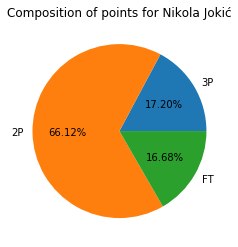

In [153]:
#Now, let's check each individual's points composition

player5 = top_five_players[top_five_players.Player=="Nikola Jokić"]
player5_3P = player5['3P']*3
player5_2P = player5['2P']*2
player5_FT = int(player5['FT'])

slices = [player5_3P,player5_2P,player5_FT]
point_typ = ['3P','2P','FT']

plt.pie(slices,labels=point_typ, autopct='%1.2f%%')
plt.title("Composition of points for Nikola Jokić")
plt.show()

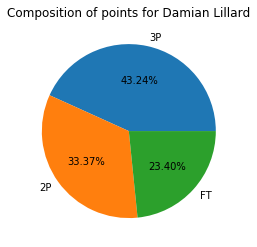

In [154]:
player4 = top_five_players[top_five_players.Player=="Damian Lillard"]
player4_3P = player4['3P']*3
player4_2P = player4['2P']*2
player4_FT = int(player4['FT'])

slices = [player4_3P,player4_2P,player4_FT]
point_typ = ['3P','2P','FT']

plt.pie(slices,labels=point_typ, autopct='%1.2f%%')
plt.title("Composition of points for Damian Lillard")
plt.show()

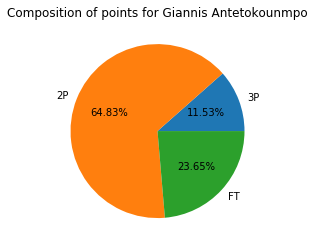

In [155]:
player3 = top_five_players[top_five_players.Player=="Giannis Antetokounmpo"]
player3_3P = player3['3P']*3
player3_2P = player3['2P']*2
player3_FT = int(player3['FT'])

slices = [player3_3P,player3_2P,player3_FT]
point_typ = ['3P','2P','FT']

plt.pie(slices,labels=point_typ, autopct='%1.2f%%')
plt.title("Composition of points for Giannis Antetokounmpo")
plt.show()

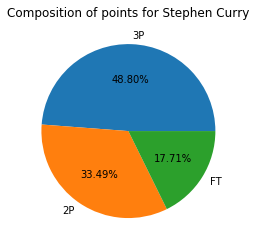

In [156]:
player2 = top_five_players[top_five_players.Player=="Stephen Curry"]
player2_3P = player2['3P']*3
player2_2P = player2['2P']*2
player2_FT = int(player2['FT'])

slices = [player2_3P,player2_2P,player2_FT]
point_typ = ['3P','2P','FT']

plt.pie(slices,labels=point_typ, autopct='%1.2f%%')
plt.title("Composition of points for Stephen Curry")
plt.show()

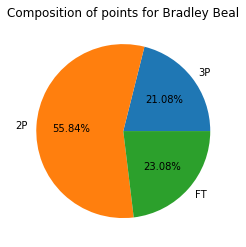

In [157]:
player1 = top_five_players[top_five_players.Player=="Bradley Beal"]
player1_3P = player1['3P']*3
player1_2P = player1['2P']*2
player1_FT = int(player1['FT'])

slices = [player1_3P,player1_2P,player1_FT]
point_typ = ['3P','2P','FT']

plt.pie(slices,labels=point_typ,autopct='%1.2f%%')
plt.title("Composition of points for Bradley Beal")
plt.show()

## Task 2.2 
Assuming that the data collector makes an entry error when collecting data, it can be ensured that the error occurred in the 3P, 3PA and 3P% columns, but it is not sure which player's information the error lies on. Please try to explore the error by visualization to identify how many errors there are and try to fix it.


In [158]:
# Code goes after this line by adding cells

In [159]:
#We have filled missing values in 3P%, however, we did not remove outliers. We earlier stated all values are valid. But there 
#can be some errors that we might have overlooked. We can instead plot a box plot and determine whether there are no errors or
#not. 

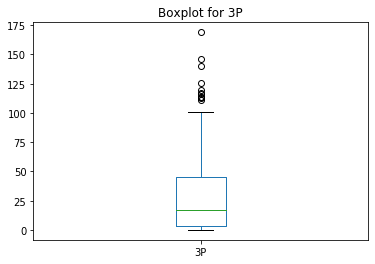

169


In [160]:
threeP = cleaned_NBA_data['3P']
threeP.plot(kind='box')
plt.title("Boxplot for 3P")
plt.show()
print(threeP.max())
#Could 169 be the data entry error? It looks way off from the box plot. The other two outliers below it looks fine as it could 
#indicate a player overperformed. So the same can be applied to 169

In [161]:
data_c0 = cleaned_NBA_data[['3P','3PA','3P%']][cleaned_NBA_data['3P']==169]

data_c0.head(5)
#The player could have performed above the expecations. Therefore, we can't simply remove or change the data.

,3P,3PA,3P%
110,169,411,0.411


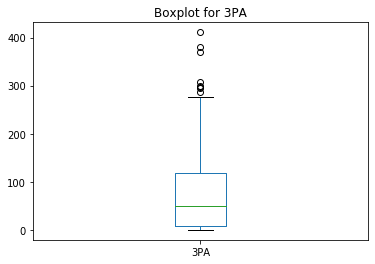

411


In [162]:
threePA = cleaned_NBA_data['3PA']
threePA.plot(kind='box')
plt.title("Boxplot for 3PA")
plt.show()
print(threePA.max())
#Again, we have an outlier way off from max_whisker. But can we declare it as data entry error? No, because it could mean a player
#tried to make more attempts during all the games. It would obvioulsy be unusual if 411 attempts is for a game or two. 

In [163]:
data_c1 = cleaned_NBA_data[['G','3P','3PA']][cleaned_NBA_data['3PA']==411]

data_c1.head()
#Therefore, this is not an invalid outlier. It's valid since it's can be achieved by a skilled basketball player within 35 games

,G,3P,3PA
110,35,169,411


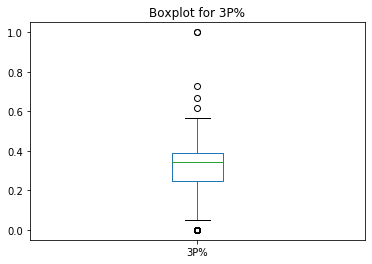

1.0


In [164]:
threeP_perc = cleaned_NBA_data['3P%']
threeP_perc.plot(kind='box')
plt.title("Boxplot for 3P%")
plt.show()
print(threeP_perc.max())
#A player defintely can not acquire 100% success rate in a game. This is clearly an invalid data entry error, given that the 
#data entry collector made a mistake in 3P, 3PA and 3P%. However, we can't quickly come to an conclusion.

In [165]:
data = cleaned_NBA_data[['3P','3PA','3P%']][cleaned_NBA_data['3P%']==1]

data.head(5)
#A player has made only one attempt and managed to be successful in that attempt itself. This can be a possibility as a player on
#the defence side can take a shot and score a goal. Therefore, there is no strong reason to drop this out. 

,3P,3PA,3P%
246,1,1,1.0
432,1,1,1.0


In [166]:
#In short, we have already corrected the errors of data entry collector in Task 1 itself. Despite the fact outliers are way off
#from the max_whisker, there is no proper reason or justification to remove them. This can be one insight to judge a player's
#performance, which explains that hundred percent success rate does not neccessarily translate to huge numbers of 3P or 2P given
#that higher 3PA and 2PA means less chances for hundred percent successful points.

## Task 2.3 
Please analyze the relationship between the player's total points and the rest features (columns). Please use at least three other columns.


In [167]:
# Code goes after this line by adding cells

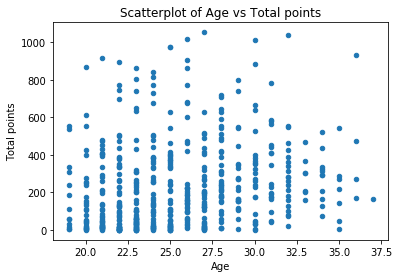

In [168]:
#Features such as Age, position of player, number of personal fouls, number of steals and number of field goal attempts
#can provide interesting insights

#Age vs Total Points

cleaned_NBA_data.plot(kind='scatter',x='Age',y='PTS')
plt.title("Scatterplot of Age vs Total points")
plt.xlabel('Age')
plt.ylabel("Total points")
plt.show()
#No relation between Age and Total points it seems!

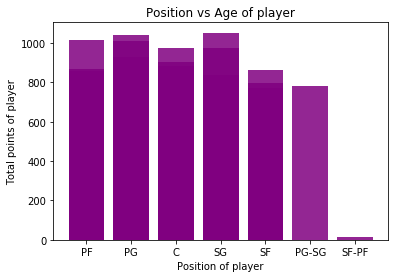

In [169]:
#Pos vs PTS
pos = cleaned_NBA_data['Pos']
t_pts = cleaned_NBA_data['PTS']

plt.bar(pos, t_pts,align='center',alpha=0.85,color='purple')

plt.xlabel('Position of player')
plt.ylabel('Total points of player')

plt.title('Position vs Age of player')

plt.show()
#We can see which area of points was more frequent. The dark part suggests players in those positions score those points mostly
#The light part at the top of each bar indicates a lower frequency of scoring in that range.

In [170]:
cleaned_NBA_data['Pos'].value_counts()
#SG is the position that can guarantee more points in comparsion to other positions. 
#However, it's not frequent to score more unlike position PG where it's frequent to score up to 1000.
#Both PG-SG and SF-PF have only one instance, so it's not fair to judge whether more points are guaranteed on these positions 
#using this data. 

SG       123
PF       104
C        100
PG        97
SF        86
PG-SG      1
SF-PF      1
Name: Pos, dtype: int64

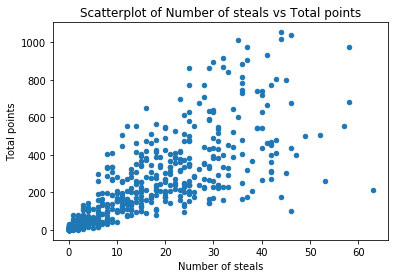

In [171]:
#Number of steals vs Total points

cleaned_NBA_data.plot(kind='scatter',x='STL',y='PTS')
plt.title("Scatterplot of Number of steals vs Total points")
plt.xlabel('Number of steals')
plt.ylabel("Total points")
plt.show()
#clear relation can be seen here in the scatterplot

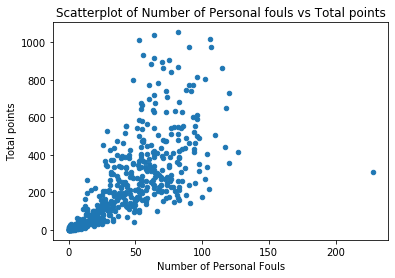

In [172]:
#Number of PF vs Total points

cleaned_NBA_data.plot(kind='scatter',x='PF',y='PTS')
plt.title("Scatterplot of Number of Personal fouls vs Total points")
plt.xlabel('Number of Personal Fouls')
plt.ylabel("Total points")
plt.show()
#barring some outliers, we can see a positive linear relationship here. 

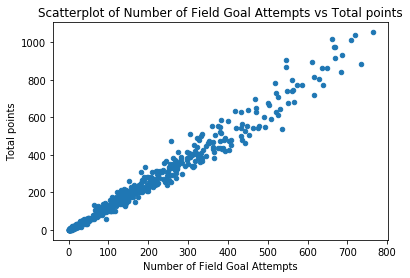

In [ ]:
#Number of field goal attempts vs total points

cleaned_NBA_data.plot(kind='scatter',x='FGA',y='PTS')
plt.title("Scatterplot of Number of Field Goal Attempts vs Total points")
plt.xlabel('Number of Field Goal Attempts')
plt.ylabel("Total points")
plt.show()
#strong positive linear relationship!